$\textbf{PROGRAMMING ASSIGNMENT}$
---

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/34/diabetes.


### Complete the Tasks in bold

## Data Exploration



In [108]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [115]:
forest_fires = fetch_ucirepo(id=162) 
  
X = forest_fires.data.features 
y = forest_fires.data.targets 
  
print(forest_fires.variables) 

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

In [116]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

X.loc[:, 'month'] = X['month'].map(month_map)
X.loc[:, 'day'] = X['day'].map(day_map)

df = pd.concat([X, y], axis=1)

print(df)

     X  Y month day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5     3   5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4    10   2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4    10   6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6     3   5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6     3   7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3     8   7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4     8   7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4     8   7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4     8   6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3    11   2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


**TASK: Create a correlation heatmap.**

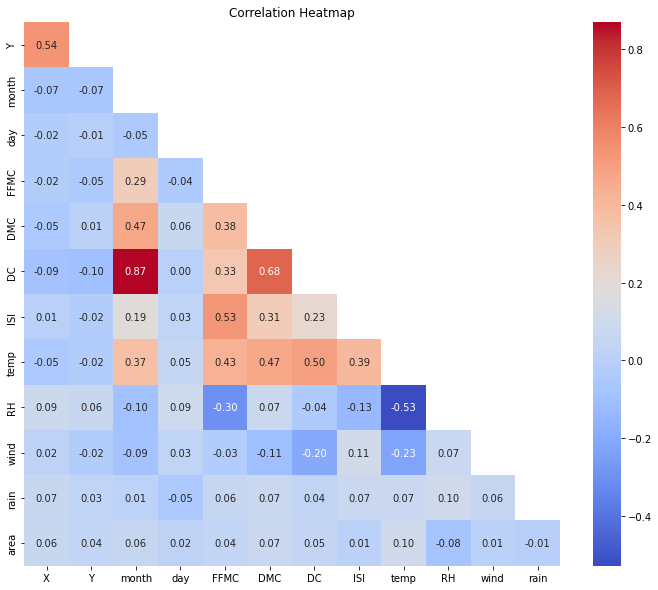

In [86]:
correlation_heatmap = df.corr()

plt.figure(figsize=(12, 10))

mask = np.zeros_like(correlation_heatmap, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_heatmap.mask(mask).dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [87]:
correlation_with_target = df.corrwith(X.iloc[:, -1]).abs()

sorted_correlation = correlation_with_target.sort_values(ascending=False)

top_correlated_features = sorted_correlation.head(5)

print("The top 5 correlated frequencies with the target/label:\n");
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

rain    1.000000
RH      0.099751
DMC     0.074790
temp    0.069491
ISI     0.067668
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (465, 12)
y_train: (465, 1)
X_test: (52, 12)
y_test: (52, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [102]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsRegressor())  
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [103]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())

full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [104]:
print("The best parameters are:")

param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

The best parameters are:


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

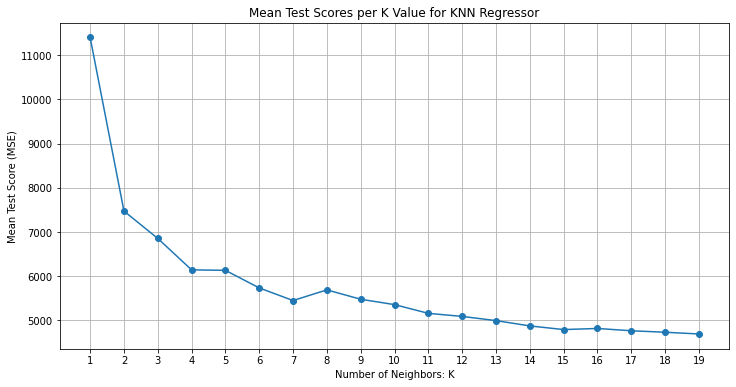

In [105]:
cv_results = full_cv_regressor.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = [param['knn__n_neighbors'] for param in cv_results['params']]

plt.figure(figsize=(12, 6))
plt.plot(k_values, -mean_test_scores, marker='o') 

plt.title('Mean Test Scores per K Value for KNN Regressor')

plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Test Score (MSE)')

plt.xticks(k_values)

plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [218]:
best_estimator = full_cv_regressor.best_estimator_

y_pred = best_estimator.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix Array:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16


Confusion Matrix Array:
[[5 0 2 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]] 


